### Loading the dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
celeba_bldr= tfds.builder('celeb_a')
celeba_bldr.download_and_prepare()
celeba=celeba_bldr.as_dataset(shuffle_files=False)
celeba_train= celeba['train']
celeba_valid= celeba['validation']
celeba_test= celeba['test']
def count_items(ds):
    n=0
    for _ in ds:
        n+=1
    return n

Shuffling and writing examples to /Users/rohitganti/tensorflow_datasets/celeb_a/2.0.1.incompleteWH5HJW/celeb_a-train.tfrecord


Shuffling and writing examples to /Users/rohitganti/tensorflow_datasets/celeb_a/2.0.1.incompleteWH5HJW/celeb_a-validation.tfrecord


Shuffling and writing examples to /Users/rohitganti/tensorflow_datasets/celeb_a/2.0.1.incompleteWH5HJW/celeb_a-test.tfrecord


Dataset celeb_a downloaded and prepared to /Users/rohitganti/tensorflow_datasets/celeb_a/2.0.1. Subsequent calls will reuse this data.


In [2]:
print('Train set: {}'.format(count_items(celeba_train)))

Train set: 162770


In [3]:
print('Validation set: {}'.format(count_items(celeba_valid)))

Validation set: 19867


In [4]:
print('Test set: {}'.format(count_items(celeba_test)))

Test set: 19962


In [5]:
celeba_train= celeba_train.take(16000)
celeba_valid= celeba_valid.take(1000)

In [6]:
print('Train set: {}'.format(count_items(celeba_train)))

Train set: 16000


In [7]:
print('Validation set: {}'.format(count_items(celeba_valid)))

Validation set: 1000


### Image transformation and data augmentation

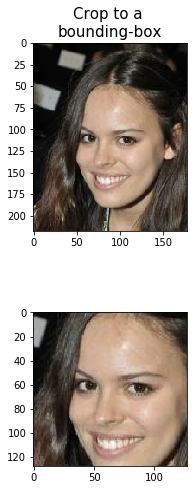

In [8]:
import matplotlib.pyplot as plt
examples=[]
for example in celeba_train.take(5):
    examples.append(example['image'])
#Column 1:cropping to a bounding-box
fig= plt.figure(figsize=(16,8.5))
ax=fig.add_subplot(2,5,1)
ax.set_title('Crop to a \nbounding-box',size=15)
ax.imshow(examples[0])
ax= fig.add_subplot(2,5,6)
img_cropped= tf.image.crop_to_bounding_box(examples[0],50,20,128,128)
ax.imshow(img_cropped)

In [15]:
#Column 2:flipping horizontally
ax=fig.add_subplot(2,5,2)
ax.set_title('Flip (horizontal)',size=15)
ax.imshow(examples[1])
ax=fig.add_subplot(2,5,7)
img_flipped= tf.image.flip_left_right(examples[1])
ax.imshow(img_flipped)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [16]:
#Column 3: adjust contrast
ax= fig.add_subplot(2,5,3)
ax.set_title('Adjust contrast', size=15)
ax.imshow(examples[2])
ax= fig.add_subplot(2,5,8)
img_adj_contrast= tf.image.adjust_contrast(examples[2], contrast_factor=2)
ax.imshow(img_adj_contrast)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [17]:
#Column 4: adjust brightness
ax=fig.add_subplot(2,5,4)
ax.set_title('Adjust brightness', size=15)
ax.imshow(examples[3])
ax= fig.add_subplot(2,5,9)
img_adj_brightness= tf.image.adjust_brightness(examples[3], delta=0.3)
ax.imshow(img_adj_brightness)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


In [18]:
#Column 5: cropping image from center
ax= fig.add_subplot(2,5,5)
ax.set_title('Centeral crop\nand resize',size=15)
ax.imshow(examples[4])
ax= fig.add_subplot(2,5,10)
img_center_crop= tf.image.central_crop(examples[4],0.7)
img_resized= tf.image.resize(img_center_crop, size=(218,728))
ax.imshow(img_resized.numpy().astype('uint8'))

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


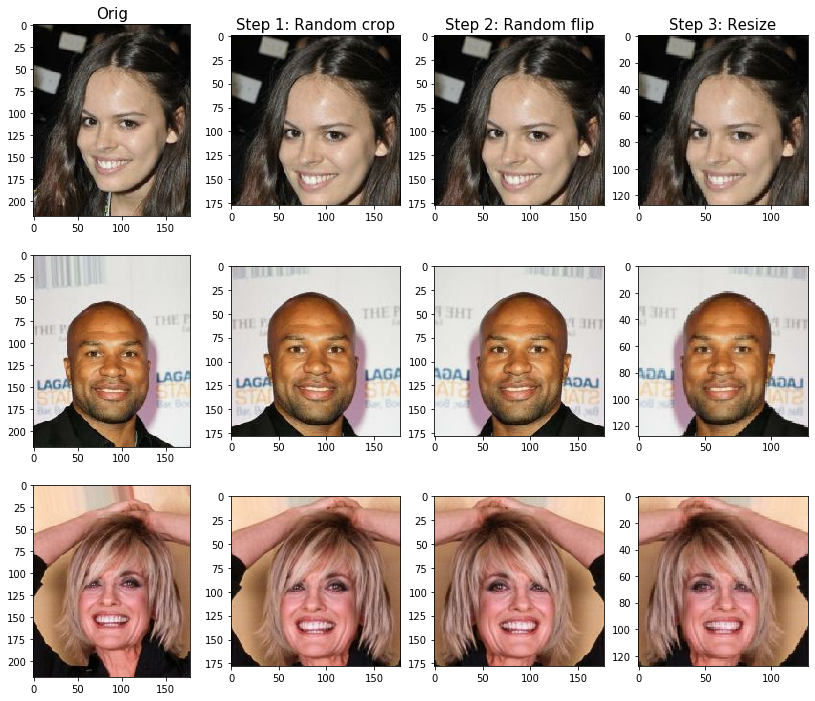

In [21]:
tf.random.set_seed(1)
fig= plt.figure(figsize=(14,12))
for i,example in enumerate(celeba_train.take(3)):
    image= example['image']
    ax= fig.add_subplot(3,4,i*4+1)
    ax.imshow(image)
    if i==0:
        ax.set_title('Orig',size=15)
        
    ax=fig.add_subplot(3,4,i*4+2)
    img_crop= tf.image.random_crop(image,size=(178,178,3))
    ax.imshow(img_crop)
    if i==0:
        ax.set_title('Step 1: Random crop',size=15)
    ax= fig.add_subplot(3,4,i*4+3)
    img_flip= tf.image.random_flip_left_right(img_crop)
    ax.imshow(tf.cast(img_flip,tf.uint8))
    if i==0:
        ax.set_title('Step 2: Random flip', size=15)
        
    ax= fig.add_subplot(3,4,i*4+4)
    img_resize= tf.image.resize(img_flip, size=(128,128))
    ax.imshow(tf.cast(img_resize, tf.uint8))
    if i==0:
        ax.set_title('Step 3: Resize',size=15)
plt.show()

In [22]:
def preprocess(example,size=(64,64), mode='train'):
    image= example['image']
    label = example['attributes']['Male']
    if mode == 'train':
        image_cropped= tf.image.random_crop(image,size(178,178,3))
        image_resized= tf.image.resize(image_cropped, size=size)
        image_flip= tf.image.random_flip_left_right(image_resized)
        return image_flip/255.0, tf.cast(label, tf.int32)
    else:
        image_cropped= tf.image.crop_to_bounding_box(image,offset_height=20, offset_width=0, target_height=178, target_width=178)
        image_resized= tf.image.resize(image_cropped,size=size)
        return image_resized/255.0, tf.cast(label,tf.int32)

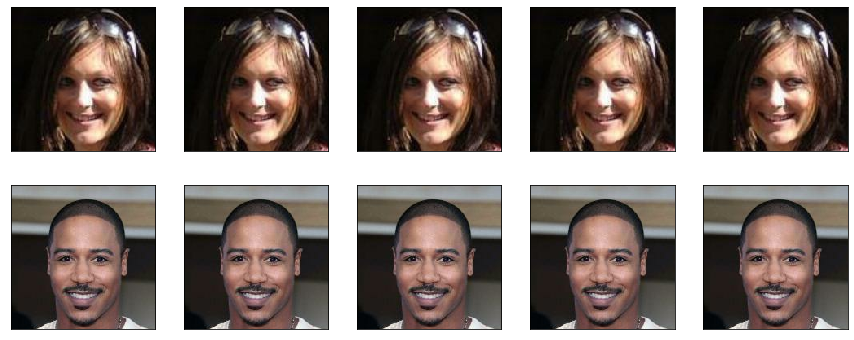

In [57]:
tf.random.set_seed(1)
ds= celeba_train.shuffle(1000, reshuffle_each_iteration= False)
ds= ds.take(2).repeat(5)
ds= ds.map(lambda x:preprocess(x,size=(178,178), mode= 'eval'))
fig= plt.figure(figsize=(15,6))
for j,example in enumerate(ds):
    ax=fig.add_subplot(2,5,j//2+(j%2)*5+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])
plt.show()

In [25]:
import numpy as np
BATCH_SIZE= 32
BUFFER_SIZE= 1000
IMAGE_SIZE=(64,64)
steps_per_epoch= np.ceil(16000/BATCH_SIZE)

In [81]:
ds_train= celeba_train.map(lambda x: preprocess(x, size=IMAGE_SIZE, mode='train'))

TypeError: in user code:

    <ipython-input-26-56f891d74d53>:1 None  *
        lambda x: preprocess(x, size= IMAGE_SIZE,mode='train'))
    <ipython-input-22-4ca503bd83b7>:5 preprocess  *
        image_cropped= tf.image.random_crop(image,size(178,178,3))

    TypeError: 'tuple' object is not callable


In [72]:
ds_train = ds_train.shuffle(buffer_size= BUFFER_SIZE).repeat()

In [73]:
ds_train= ds_train.batch(BATCH_SIZE)

In [74]:
ds_valid= celeba_valid.map(lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval'))

### Training the CNN gender classifier

In [75]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation= 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')
])

In [76]:
model.compute_output_shape(input_shape=(None,64,64,3))

TensorShape([None, 8, 8, 256])

In [77]:
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.compute_output_shape(input_shape=(None,64,64,3))

TensorShape([None, 256])

In [78]:
model.add(tf.keras.layers.Dense(1, activation= None))
tf.random.set_seed(1)
model.build(input_shape=(None, 64,64,3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)      

In [79]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [80]:
history= model.fit(ds_train, validation_data= ds_valid, epochs=1, steps_per_epoch= steps_per_epoch)

500/500 [==============================] - ETA: 0s - loss: 0.6225 - accuracy: 0.6277

ValueError: in user code:

    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1228 test_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1219 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1231 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2764 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3151 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1212 run_step  **
        outputs = model.test_step(data)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1178 test_step
        y_pred = self(x, training=False)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:977 __call__
        self.name)
    /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:203 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [64, 64, 3]


In [86]:
hist= history.history
x_arr= np.arange(len(hist['loss']))+1
fig= plt.figure((12,4))
ax= fig.add_subplot(1,2,1)
ax.plot(x_arr,hist['loss'],'-o',label= 'Train loss')
ax.plot(x_arr, hist['val_loss'],'--<',label= 'Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epochs', size=15)
ax.set_ylabel('Epochs', size=15)
ax= fig.add_subplot(1,2,2)
ax.plot(x_arr, hist['accuracy'], '-o', label= 'Train acc.')
ax.plot(x_arr, hist['val_accuracy'],'--<',label= 'Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Epoch', size=15)
plt.show()

KeyError: 'loss'

In [91]:
history= model.fit(ds_train, validation_data= ds_valid, epochs=1, initial_epoch=1, steps_per_epoch=steps_per_epoch)

In [92]:
ds_test= celeba_test.map(lambda x: preprocess(x, size=IMAGE_SIZE, mode='eval')).batch(32)

In [93]:
test_results= model.evaluate(ds_test)

624/624 [==============================] - 15s 25ms/step - loss: 0.2977 - accuracy: 0.8724


In [94]:
print('Test acc. {:.2f}%'.format(test_results[1]*100))

Test acc. 87.24%


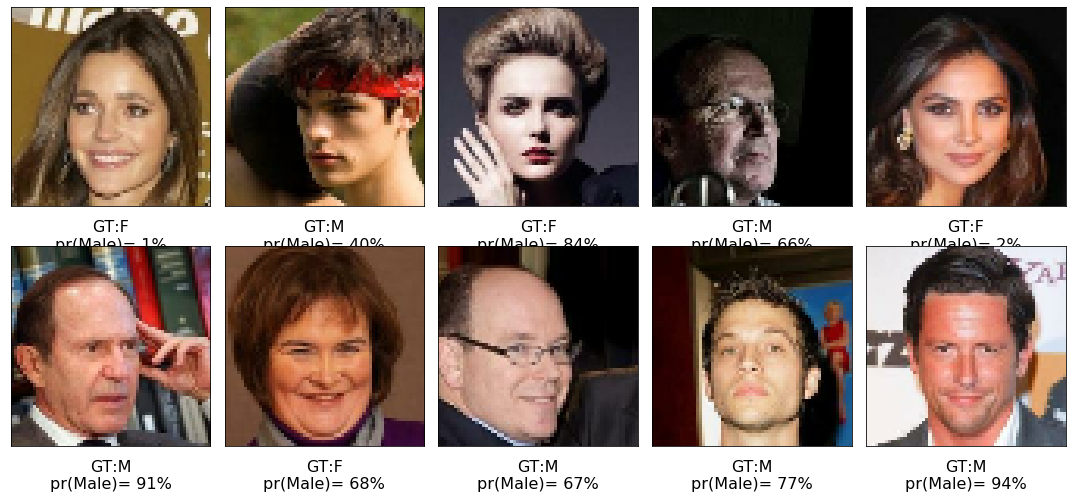

In [95]:
ds= ds_test.unbatch().take(10)
pred_logits= model.predict(ds.batch(10))
probas= tf.sigmoid(pred_logits)
probas= probas.numpy().flatten()*100
fig= plt.figure(figsize= (15,7))
for j,example in enumerate(ds):
    ax=fig.add_subplot(2,5,j+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    if example[1].numpy()==1:
        label='M'
    else:
        label='F'
    ax.text(0.5, -0.15, 'GT:{:s}\npr(Male)= {:.0f}%'.format(label,probas[j]),size=16, horizontalalignment='center',verticalalignment='center',transform= ax.transAxes)
plt.tight_layout()
plt.show()